# Adult DataSet

## Data engineering & Data processing

### Libraries

In [121]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset general information

In [42]:
df = pd.read_csv("DATA/adult/adult.data", header=None,  skipinitialspace=True)

In [43]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
# How many rows / columns?
print("Columns: ",df.columns)
print("number of Rows and Columns: ",df.shape)

Columns:  Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')
number of Rows and Columns:  (32561, 15)


In [45]:

column_names = [
     'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
    'income'
]

In [46]:
df = pd.read_csv('DATA/adult/adult.data', names=column_names, header=None)

In [34]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [48]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  str  
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  str  
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  str  
 6   occupation      32561 non-null  str  
 7   relationship    32561 non-null  str  
 8   race            32561 non-null  str  
 9   sex             32561 non-null  str  
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  str  
 14  income          32561 non-null  str  
dtypes: int64(6), str(9)
memory usage: 3.7 MB


##### What is one row semantically?
There is a white male who is 39 years old, works for state government, has a Bachlelor's degree, works 40 hours a week, lives in USA, this person is not married and earns less than 50K. 

#### What does one target value correspond to?
Target value is income

#### Is the dataset static or temporal?
There is no time stamp so its static

#### Are samples independent?
Yes, the samples are assumed to be independent.
One row represent one person.
i.i.d

### 2. Target variable understanding


#### Target type (binary / multiclass / continuous). --> binary classification 
#### Possible value range. --> > >50k or <= 50k
#### Class balance or distribution. --> normal
#### What a “good” vs “bad” value means

In [49]:
unique_targets = df['income'].nunique()
target_type = "Binary Classification" if unique_targets ==2 else "Multiclass/Cont"
print(f"Target Type: {target_type}")

Target Type: Binary Classification


In [50]:
value_range = df['income'].unique()
print(f"Possible Value Range: {value_range}")

Possible Value Range: <StringArray>
[' <=50K', ' >50K']
Length: 2, dtype: str


In [51]:
distribution = df['income'].value_counts(normalize=True) * 100
print("Class Distribution (%):")
print(distribution)

Class Distribution (%):
income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64


In [52]:
# In socio-economic context [1], earning more is the positive/good outcome.
print("\nInterpretation:")
print(" - 'Good' (Positive Class): >50K (Higher Income)")
print(" - 'Bad' (Negative/Baseline Class): <=50K (Lower Income)")


Interpretation:
 - 'Good' (Positive Class): >50K (Higher Income)
 - 'Bad' (Negative/Baseline Class): <=50K (Lower Income)


### 3. For each feature, please document:
#### a. Feature type
- Numeric / categorical / boolean / timestamp / text
- Continuous vs discrete
- Encoded vs raw
#### b. Feature meaning
- What it likely represents
- Units (if numeric)
- Expected behavior (monotonic, bounded, periodic, etc.)
#### Data quality signals
- Missing values
- Constant or near-constant columns
- Suspicious distributions
- Obvious correlations with target


Numeric Features
- age
    -- Type: Numeric, continuous, raw.
    -- Meaning: The individual's age in years; values are bounded.
    -- Quality: No missing values observed in excerpts; higher values often correlate with the >50K income class.
- fnlwgt (Final Weight)
    -- Type: Numeric, continuous, raw.
    -- Meaning: Represents the number of people the census entry signifies in the general population.
    -- Quality: Exhibits high variance and no obvious correlation with the target.
- education-num
    ◦ Type: Numeric, continuous, encoded (ordinal).
    ◦ Meaning: A numeric ranking of the highest education level reached.
    ◦ Quality: Strong positive correlation with target; high values like 13 (Bachelors) or 14 (Masters) appear frequently in the >50K class.
- capital-gain
    ◦ Type: Numeric, continuous, raw.
    ◦ Meaning: Profit from the sale of assets (Units: USD).
    ◦ Quality: Heavily skewed with most values at 0; high earners are capped at 99999.
- capital-loss
    ◦ Type: Numeric, continuous, raw.
    ◦ Meaning: Loss from the sale of assets (Units: USD).
    ◦ Quality: Heavily skewed with the majority of entries being 0.
- hours-per-week
    ◦ Type: Numeric, continuous, raw.
    ◦ Meaning: Average working hours per week.
    ◦ Quality: Bounded between 1 and 99; values significantly higher than 40 often correlate with the >50K class.
    
Categorical Features
- workclass
    ◦ Type: Categorical, discrete, raw.
    ◦ Meaning: Sector of employment (e.g., Private, State-gov).
    ◦ Quality: Contains missing values represented as ?.
- education
    ◦ Type: Categorical, discrete, raw.
    ◦ Meaning: Highest degree or level of schooling achieved.
    ◦ Quality: Redundant with education-num.
- marital-status
    ◦ Type: Categorical, discrete, raw.
    ◦ Meaning: Current civil status.
    ◦ Quality: "Married-civ-spouse" is the most frequent status among individuals earning >50K.
- occupation
    ◦ Type: Categorical, discrete, raw.
    ◦ Meaning: The specific job role held.
    ◦ Quality: Contains missing values represented as ?.
- relationship
    ◦ Type: Categorical, discrete, raw.
    ◦ Meaning: The person's role in the household (e.g., Husband, Wife).
- race
    ◦ Type: Categorical, discrete, raw.
    ◦ Meaning: Ethnic background.
    ◦ Quality: Heavily imbalanced distribution with "White" as the dominant category.
- sex
    ◦ Type: Categorical, discrete, raw.
    ◦ Meaning: Biological gender (Male/Female).
- native-country
    ◦ Type: Categorical, discrete, raw.
    ◦ Meaning: Country of origin.
    ◦ Quality: Near-constant column (dominated by "United-States") and contains missing values as ?.

### 4. Feature–Target Relationship
- Does this feature exist before we know the person’s income, or only after?
- Could this feature indirectly reveal the income by itself?
- Does this feature make the prediction too easy in an unrealistic way?


To understand the relationship between these features and the target income variable, we can categorize them by their timing, predictive strength, and potential for data leakage.

1. Temporal Relationship (Before vs. After)
In the context of this dataset, all features represent attributes collected at the same time as the income was recorded.
• Existing "Before": Demographic features like age, race, sex, and native-country are fixed traits. Education-related features (education, education-num) represent historical attainment reached prior to the income measurement.
• Concurrent Characteristics: Employment and social status (workclass, occupation, marital-status, hours-per-week) describe the individual's current situation that results in their income level.
• Result-Oriented: Features like capital-gain and capital-loss are financial outcomes that occur within the same year as the income measurement, but strictly speaking, they are collected simultaneously rather than "after" the income bracket is determined.

2. Indirect Revelation of Income
Several features serve as strong proxies that can indirectly reveal the income bracket:
• Education-Num: There is a heavy concentration of the >50K class among those with higher numeric rankings (e.g., 13 for Bachelors, 14 for Masters, 16 for Doctorate).
• Occupation: High-status roles like Exec-managerial and Prof-specialty are disproportionately associated with the >50K target across various records.
• Marital Status & Relationship: Being a Married-civ-spouse (often with a relationship status of Husband or Wife) appears as a strong indicator of the higher income bracket in many snippets.

3. Predictability and Realism
One feature in particular makes the prediction potentially "too easy" or unrealistic:
• Capital-Gain: In the source data, individuals with significant capital gains—specifically those at the cap of 99999—are almost exclusively associated with the >50K income category.
• The Risk: Because capital gains are technically a component of wealth/income, a model might "cheat" by simply looking for any non-zero value in this column to predict high income. This can lead to a model that performs perfectly on this dataset but fails to generalize to individuals whose income is derived solely from high wages rather than investment profit.

## EDA/Visualization


### Exploratory Data Analysis
1. Visualize distributions of numeric features (histograms, box plots).
- Look at target distribution and class balance.
- Compare feature distributions for different target values.
- Check simple correlations between numeric features and the target.

2. Identify outliers or unusual patterns.
- Feature preprocessing
- Decide which features should be scaled or normalized and explain why.
- Decide how categorical features should be handled.
- Identify features that may leak target information or look suspicious.
- Decide if any features should be dropped and explain the reasoning.


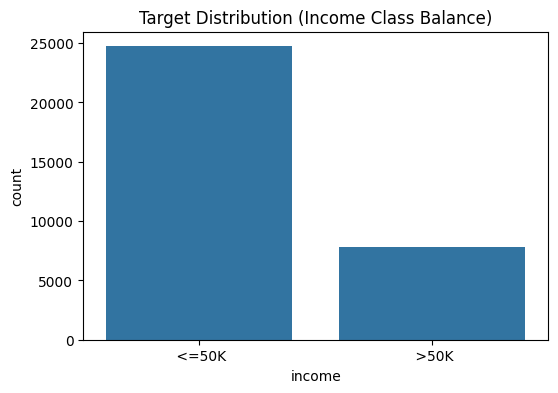

In [53]:
# 1. Visualize target distribution and class balance
plt.figure(figsize=(6,4))
sns.countplot(x= 'income' ,data=df)
plt.title('Target Distribution (Income Class Balance)')
plt.show()

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


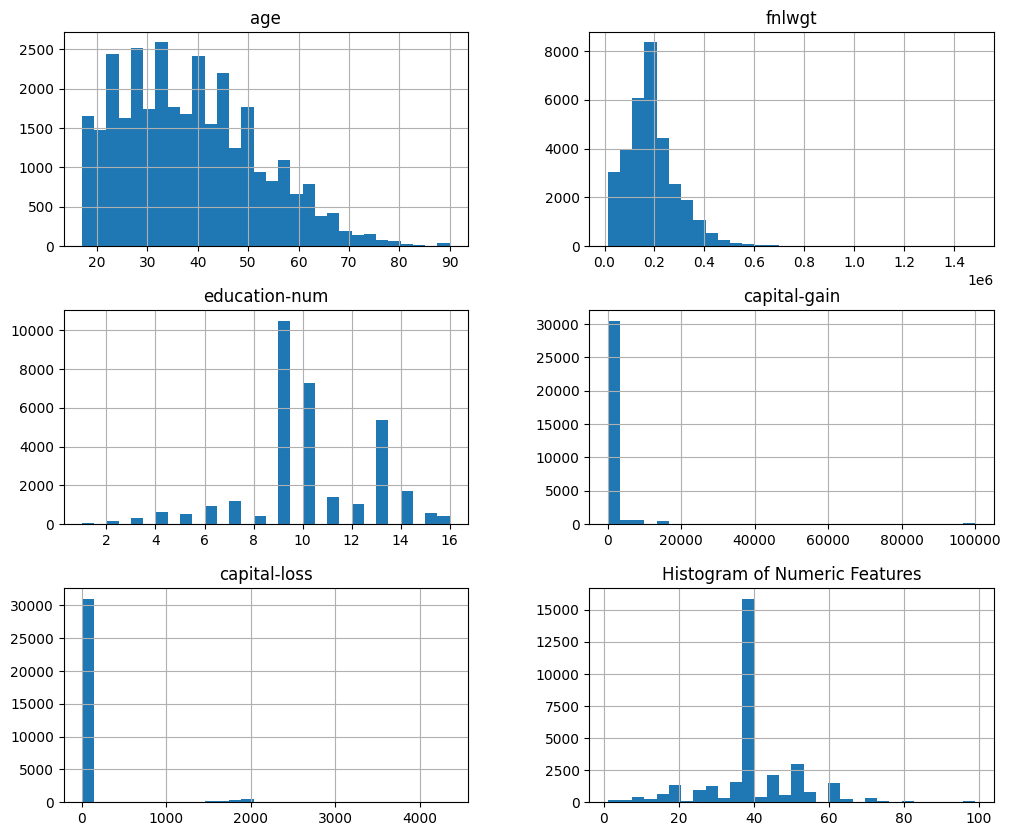

In [88]:
# 2. Visualize distributions of numeric features (Histograms)
print(column_names) #
numeric_features = ['age', 'fnlwgt', 'education-num',  'capital-gain', 'capital-loss', 'hours-per-week']
df[numeric_features].hist(figsize=(12,10), bins=30)
plt.title('Histogram of Numeric Features')
plt.show()

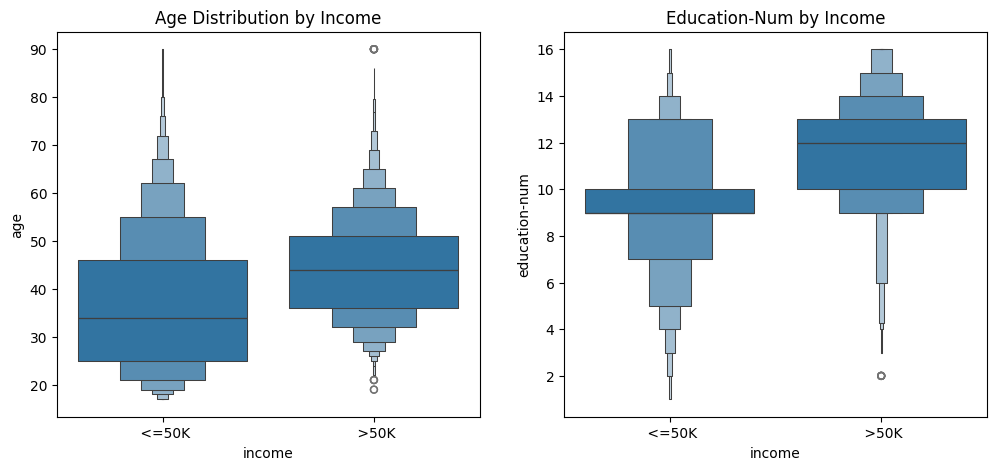

In [89]:
# 3. Compare feature distributions for different target values
# Example: Age and Education-Num by Income
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.boxenplot(x='income' , y='age', data=df)
plt.title('Age Distribution by Income')

plt.subplot(1, 2, 2)
sns.boxenplot(x='income', y='education-num', data=df)
plt.title('Education-Num by Income')
plt.show()

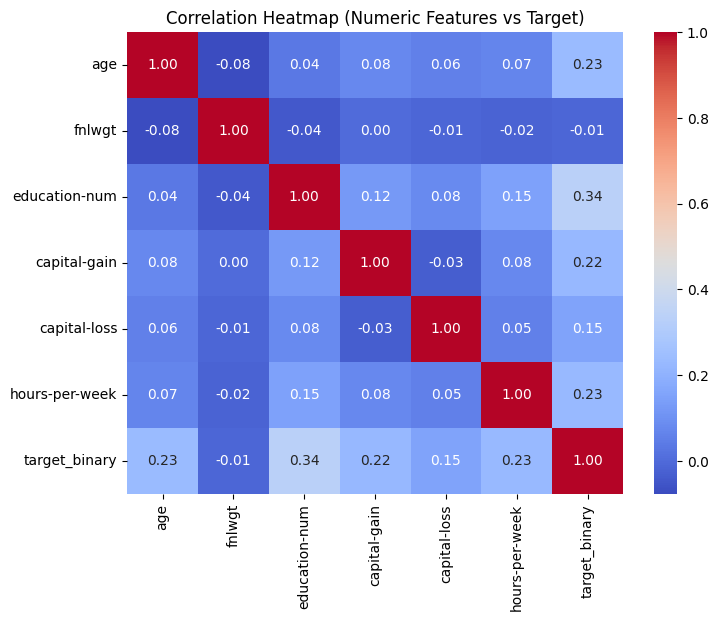

In [90]:
# 4. Check simple correlations between numeric features and the target
# Encode target to numeric for correlation calculation

df['target_binary'] = df['income'].str.strip().map({'>50K': 1, '<=50K': 0})
correlation_matrix = df[numeric_features + ['target_binary']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features vs Target)')
plt.show()

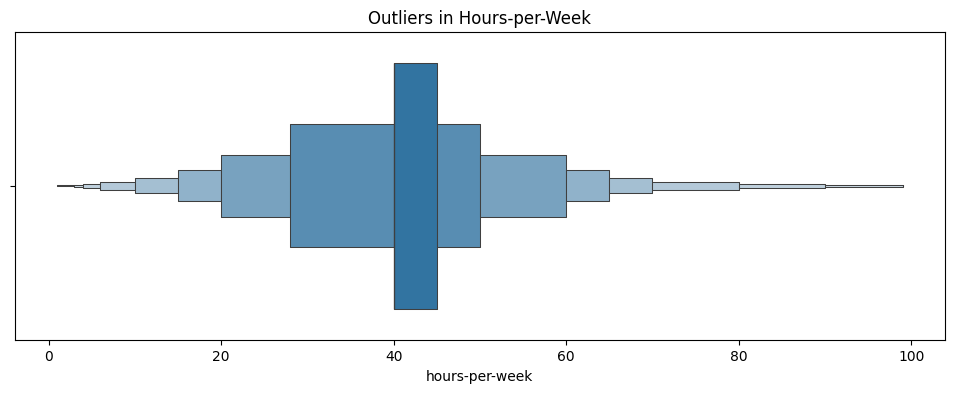

In [91]:
# 5. Identify outliers and unusual patterns
# Using box plots to see outliers in hours-per-week and capital-gain

plt.figure(figsize=(12,4))
sns.boxenplot(x=df['hours-per-week'])
plt.title('Outliers in Hours-per-Week')
plt.show()

In [92]:
# get outliers
# IQR method to find outliers
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: Found {len(outliers)} outliers")

age: Found 143 outliers
fnlwgt: Found 992 outliers
education-num: Found 1198 outliers
capital-gain: Found 2712 outliers
capital-loss: Found 1519 outliers
hours-per-week: Found 9008 outliers


In [93]:
# Special check for the capital-gain cap observed in source snippets
cap_value = 99999
capped_earners = df[df['capital-gain'] == cap_value]
print(f"\nRecords capped at 99999 capital-gain: {len(capped_earners)}")


Records capped at 99999 capital-gain: 159


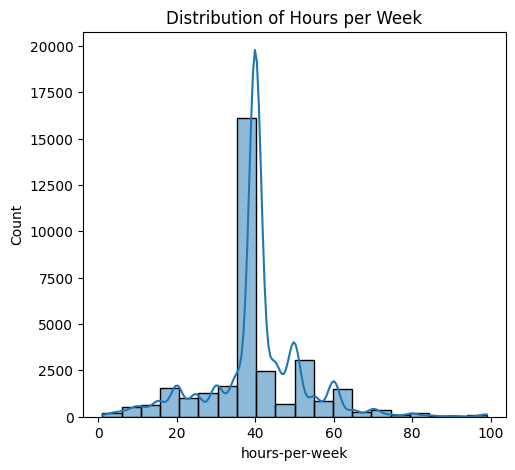

In [94]:
# set up the figure
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['hours-per-week'], bins= 20 , kde=True)
plt.title('Distribution of Hours per Week')
plt.show()

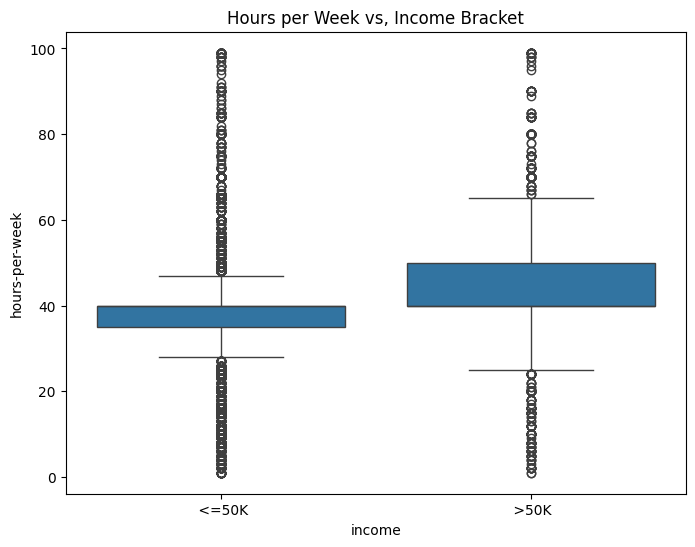

In [95]:
# Relationship with income
# Comparing work hours across the two income classes to dermine 
# if "working more" directly shifts somone into  the >50k bracket

plt.figure(figsize=(8,6))
# Box plot grouped by income
sns.boxplot(x='income', y='hours-per-week', data = df)
plt.title('Hours per Week vs, Income Bracket')
plt.show()

In [96]:
# Correlation Check
# Convert incom to numeric for correlation
df['income_binary'] = df['income'].str.strip().map({'>50K': 1, '<=50K': 0})
correlation = df['hours-per-week'].corr(df['income_binary'])
print(f"Correlation between Hours-per-Week and Income: {correlation:.2f}")

Correlation between Hours-per-Week and Income: 0.23


#### 2. Feature preprocessing
- Decide which features should be scaled or normalized and explain why.
- Decide how categorical features should be handled.
- Identify features that may leak target information or look suspicious.
- Decide if any features should be dropped and explain the reasoning.


##### Preprocessing Strategy
1. Scaling & Normalization: All numeric features (age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week) should be scaled. This is necessary because features like fnlwgt (often >100,000) operate on a vastly different scale than education-num (1–16), which can cause some models to ignore smaller but important values.

2. Categorical Handling: Features such as workclass, occupation, and native-country are nominal and should be One-Hot Encoded. For sex, a simple binary encoding (0/1) is sufficient.

3. Suspicious Features & Leakage: The capital-gain feature is suspicious because high earners are frequently capped at 99999, creating an "easy" but potentially unrealistic predictor for the >50K class .

4. Feature Dropping:
    ◦ education: Drop this column because it is redundant with education-num, which provides the same information in a model-ready ordinal format.
    ◦ fnlwgt: Many practitioners drop this as it represents population weights rather than individual predictive traits.

In [97]:
# Define feature groups
# We drop 'education' (redunant) and fnlwgt (population weight)
numeric_features_new = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']

In [100]:
df.tail(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,target_binary,income_binary
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,1,1


In [106]:
#  Drop redundant or unnecessary features
# 'education' is redundant with 'education-num'; 'fnlwgt' is population weight.
df_clean = df
df_clean = df.drop(columns=['education', 'fnlwgt'])
df_clean.head(2)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,target_binary,income_binary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0


In [ ]:
# Simplify Target and Binary features
# Used .map() for a direct 1/0 conversion of the income bracket

df_clean['income'] = df_clean['income'].str.strip().map({'>50K' : 1, '<=50K' : 0})
df_clean['sex'].str.strip().map({'Male' : 1, 'Female' : 0})
df_clean.head(1)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,target_binary,income_binary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0,0


In [ ]:
# Fill missing values
# Directly removed education because its numeric counterpart, education-num, is more efficient for modeling
df_clean=df_clean.fillna(df.mode().iloc)

In [ ]:
# One-Hot Encoding for remaining categorical columns
# Used pd.get_dummies(), which is a single line of code to handle all categorical categories like race and relationship

df_clean =pd.get_dummies(df_clean, columns=['workclass', 'marital-status', 'occupation',
                                             'relationship', 'race', 'native-country'])

df_clean.head(2)

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income,target_binary,income_binary,workclass_ ?,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,Male,2174,0,40,0,0,0,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,Male,0,0,13,0,0,0,False,...,False,False,False,False,False,False,False,True,False,False


In [110]:
# Scale numeric features
scaler = StandardScaler()
num_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

print(f"Dataset ready. Final shape: {df_clean.shape}")

Dataset ready. Final shape: (32561, 93)


### ML modeling foundations
1. Which metrics would you use to check how good the predictions are, and why?

2. What do overfitting and underfitting mean for this dataset? Give simple examples.

3. Which ML models could be tried on this dataset, and why do they make sense here?

4. What assumptions do these models make about the data, and are these assumptions realistic?

5. What could go wrong if a model works well on this dataset but is used in the real world?

6. What would be a simple baseline model, and why is it important to start with it?



- Because the Adult Census dataset is imbalanced, with a significantly higher frequency of individuals in the ≤50K category, standard Accuracy can be misleading as it may simply reflect the majority class.

- To accurately evaluate the binary classification performance, you should use:

- F1-Score: This is the harmonic mean of Precision and Recall. It is ideal for this dataset because it forces the model to perform well on the minority class (>50K) without being biased by the abundance of ≤50K records.

- ROC-AUC: This measures the model's ability to distinguish between the two income brackets across all possible thresholds.

- Confusion Matrix: This provides a breakdown of True Positives (correctly identifying high earners) versus False Positives (misidentifying lower earners as high earners), which is critical for understanding the socio-economic impact of your model's errors.


In [112]:
# One-hot encode remaining categorical feaures [1,2]
df_encoded = pd.get_dummies(df_clean, drop_first=True)

df_encoded.head(2)

,age,education-num,capital-gain,capital-loss,hours-per-week,income,target_binary,income_binary,workclass_ ?,workclass_ Federal-gov,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,sex_ Male
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,0,0,0,False,False,...,False,False,False,False,False,False,True,False,False,True
1,0.837109,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,False,False,...,False,False,False,False,False,False,True,False,False,True


In [118]:
# Train/Test split
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [119]:
# Scaling numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Training and Evaluation

In [122]:
model = LogisticRegression(max_iter =1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_log_proba(X_test_scaled)[:,1]

In [123]:
#Output Metrics
print("Classification Report (Look for F1-Score of class 1):")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report (Look for F1-Score of class 1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4945
           1       1.00      1.00      1.00      1568

    accuracy                           1.00      6513
   macro avg       1.00      1.00      1.00      6513
weighted avg       1.00      1.00      1.00      6513

ROC-AUC Score: 1.00
Confusion Matrix:
[[4945    0]
 [   0 1568]]


In [126]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
    'income'
]

# 1. Load the test file
# skiprows=1 skips the metadata row typically found in adult.test
# index_col=0 handles the leading index column seen in your sources
df_test = pd.read_csv('DATA/adult/adult.test', names=column_names, index_col=0, skiprows=1, na_values='?')

# 2. Clean the Target labels
# The test set labels often have a trailing dot (e.g., ">50K.")
df_test['income'] = df_test['income'].str.replace('.', '', regex=False).str.strip()
df_test['income_binary'] = df_test['income'].map({'>50K': 1, '<=50K': 0})

# 3. Apply Preprocessing (Drop capital-gain to avoid the leakage we found)
df_test_cleaned = df_test.drop(columns=['education', 'fnlwgt', 'capital-gain'])

# 4. Evaluate using your trained model
# Ensure you use the same scaler and encoder (e.g., scaler.transform(X_test))
print(df_test_cleaned['income_binary'].value_counts())

income_binary
0    12435
1     3846
Name: count, dtype: int64
